In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


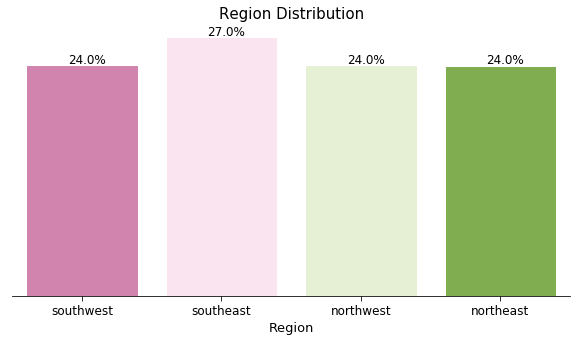

In [136]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x = 'region', data = df, palette = "PiYG", orient = 'h', ax = ax, edgecolor = '1')
for i in ax.patches:
    ax.text(i.get_x()+0.3,i.get_height()+3,str(round((i.get_height()/df.region.shape[0])*100))+'%',\
           fontsize = 12)
ax.set_xlabel("Region", fontsize = 13)
ax.set_title("Region Distribution", fontsize = 15)
ax.tick_params(length=5,labelsize=12,labelcolor = 'black')
x_axis = ax.axes.get_yaxis().set_visible(False)
sns.despine(left= True)
plt.show()

In [71]:
print("minimum age:",df['age'].min())
print("maximum age:",df['age'].max())

minimum age: 18
maximum age: 64


In [94]:
# classify age into 3 groups
# Young adult(18-25), Adult(26-50), Senior(51-64)
# convert continious variable 'age' to categorical variable  

cut_points = [17,25,50,64]
labels = ['Young adult', 'Adult', 'Senior']
df['age_category'] = pd.cut(df["age"], cut_points, labels =  labels)
set(list(df['age_category']))

{'Adult', 'Senior', 'Young adult'}

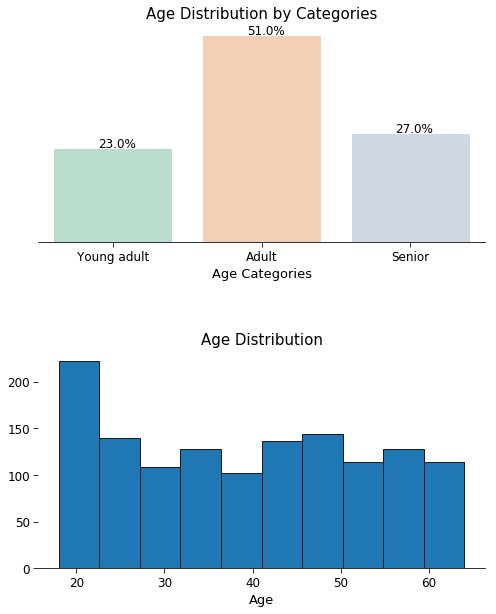

In [141]:
#Age distribution by categories

f, (ax,ax2) = plt.subplots(2,1,figsize = (8,10))
sns.countplot(x = 'age_category',data = df, palette = 'Pastel2',orient = 'v',ax = ax, edgecolor = '1')
for i in ax.patches:
    ax.text(i.get_x()+0.3,i.get_height()+3,\
           str(round((i.get_height()/df.age_category.shape[0])*100))+'%',fontsize =12)
ax.set_xlabel("Age Categories",fontsize =13)
ax.tick_params(length=5, labelsize = 12, labelcolor = 'black')
ax.set_title("Age Distribution by Categories",fontsize =15)

ax2.hist('age',bins = 10,data = df, edgecolor = '0.1')
ax2.set_xlabel("Age",fontsize =13)
ax2.tick_params(length=5, labelsize = 12, labelcolor = 'black')
ax2.set_title("Age Distribution",fontsize =15)
x_axis = ax.axes.get_yaxis().set_visible(False)
f.subplots_adjust(hspace = 0.5)
sns.despine(left=True)
plt.show()


In [143]:
#     Accent, Accent_r, Blues, Blues_r,
#     BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, 
#     GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, 
#     Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r,
#     PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r,
#     RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r,
#     Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, 
#     YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary,
#     binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, 
#     coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, 
#     gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r,
#     gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot,
#     gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, 
#     inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, 
#     nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow,
#     rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r,
#     tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, 
#     viridis, viridis_r, vlag, vlag_r, winter, winter_r    

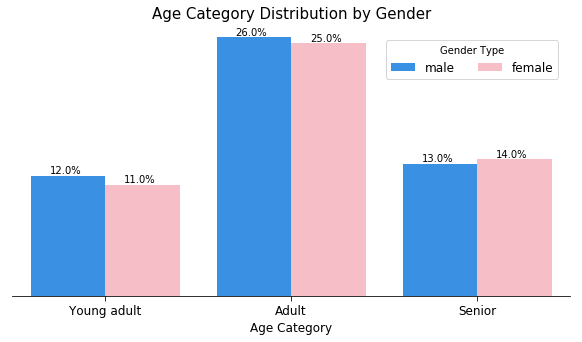

In [194]:
def gender_dist_plot(x_axis,title):
    f,ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=x_axis, data = df, ax = ax,palette=['dodgerblue','lightpink']
                  ,hue='sex', hue_order=['male','female'] )

    for i in ax.patches:
        ax.text(i.get_x()+0.1, i.get_height()+3,\
                str(round((i.get_height()/df.region.shape[0])*100))+'%')
    ax.set_title(title+ ' Distribution by Gender', fontsize = 15)
    ax.set_xlabel(title, fontsize =12)
    ax.tick_params(length=5, labelsize= 12, labelcolor = 'black')
    x_axis = ax.axes.get_yaxis().set_visible(False)
    ax.legend(loc=[0.67,0.8],fontsize = 12, title = "Gender Type",ncol=2)
    sns.despine(left = True)
    plt.show()

gender_dist_plot("age_category",'Age Category')

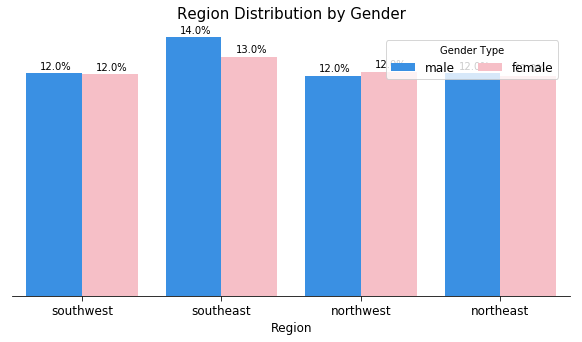

In [195]:
gender_dist_plot("region",'Region')